<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Multi-label-classification" data-toc-modified-id="Multi-label-classification-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Multi-label classification</a></span></li><li><span><a href="#The-history-callback" data-toc-modified-id="The-history-callback-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>The history callback</a></span></li><li><span><a href="#Early-stopping-your-model" data-toc-modified-id="Early-stopping-your-model-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Early stopping your model</a></span></li><li><span><a href="#A-combination-of-callbacks" data-toc-modified-id="A-combination-of-callbacks-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>A combination of callbacks</a></span></li><li><span><a href="#Different-activation-functions" data-toc-modified-id="Different-activation-functions-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Different activation functions</a></span></li><li><span><a href="#Hyperparameter-tuning" data-toc-modified-id="Hyperparameter-tuning-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Hyperparameter tuning</a></span></li><li><span><a href="#Learning-curves" data-toc-modified-id="Learning-curves-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Learning curves</a></span></li></ul></div>

# Multi-label classification

Dataset:
Our datset is composed of 2000 different samples which contains 20 sensors and 3 parcels. 
<img src="yard.png" style="width:400px;height:250px;">
<caption><center> <u><font color='purple'>Figure 1</u><font color='purple'>: <br> <font color='black'> </center>







As can be seen here, we follow this process to write the model, fit it and calculate the best hyperparameters.

<img src="schem.png" style="width:470px;height:120px;">
<caption><center> <u><font color='purple'>Figure 2</u><font color='purple'>: <br> <font color='black'> </center>

Computational details:
One-vs-all classification is a method which involves training N distinct binary classifiers, each designed for recognizing a particular class. Then those N classifiers are collectively used for multi-class classification as demonstrated below:


<img src="onevsall.png" style="width:470px;height:270px;">
<caption><center> <u><font color='purple'>Figure 3</u><font color='purple'>: <br> <font color='black'> </center>

In [2]:
from keras.models import Sequential
from keras.layers import Dense
import pandas as pd
import seaborn as sns

Using TensorFlow backend.


In [3]:
train = pd.read_csv("irrigation_machine.csv")
train.describe()

,Unnamed: 0,sensor_0,sensor_1,sensor_2,sensor_3,sensor_4,sensor_5,sensor_6,sensor_7,sensor_8,...,sensor_13,sensor_14,sensor_15,sensor_16,sensor_17,sensor_18,sensor_19,parcel_0,parcel_1,parcel_2
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,...,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.00000,2000.000000,2000.00000,2000.000000,2000.000000
mean,999.500000,1.437000,1.659000,2.654500,2.674500,2.887500,1.411000,3.315500,4.201500,1.214000,...,2.731500,3.416000,1.206500,2.325000,1.729500,2.27450,1.813500,0.63550,0.730500,0.212000
std,577.494589,1.321327,1.338512,1.699286,1.855875,1.816451,1.339394,2.206444,2.280241,1.386782,...,1.774537,1.960578,1.258034,1.715181,1.561265,1.67169,1.469285,0.48141,0.443811,0.408827
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.00000,0.000000,0.000000
25%,499.750000,0.000000,1.000000,1.000000,1.000000,2.000000,0.000000,2.000000,3.000000,0.000000,...,1.000000,2.000000,0.000000,1.000000,0.000000,1.00000,1.000000,0.00000,0.000000,0.000000
50%,999.500000,1.000000,1.000000,2.000000,2.000000,3.000000,1.000000,3.000000,4.000000,1.000000,...,2.000000,3.000000,1.000000,2.000000,1.000000,2.00000,2.000000,1.00000,1.000000,0.000000
75%,1499.250000,2.000000,2.000000,4.000000,4.000000,4.000000,2.000000,5.000000,6.000000,2.000000,...,4.000000,5.000000,2.000000,3.000000,3.000000,3.00000,3.000000,1.00000,1.000000,0.000000
max,1999.000000,8.000000,9.000000,10.000000,11.000000,12.000000,7.000000,13.000000,12.000000,8.000000,...,11.000000,11.000000,6.000000,10.000000,11.000000,10.00000,7.000000,1.00000,1.000000,1.000000


In [4]:
sensors= train.iloc[:,1:21]
parcels= train.iloc[:,21:24]
from sklearn.model_selection import train_test_split
sensors_train, sensors_test, parcels_train, parcels_test = train_test_split(sensors, parcels, test_size=0.33, random_state=42)

In [5]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import pandas as pd
import seaborn as sns
import numpy as np

# Instantiate a Sequential model
model = Sequential()
# Add a hidden layer of 64 neurons and a 20 neuron's input
model.add(Dense(64, input_shape=(20,), activation='relu'))

# Add an output layer of 3 neurons with sigmoid activation
model.add(Dense(3, activation='sigmoid'))

# Compile your model with adam and binary crossentropy loss
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])



In [8]:
# Train for 100 epochs using a validation split of 0.2
model.fit(sensors_train, parcels_train, epochs=100, validation_split=0.2, verbose= 0)

# Predict on sensors_test and round up the predictions
preds = model.predict(sensors_test)
preds_rounded = np.round(preds)

# Print rounded preds
print('Rounded Predictions: \n', preds_rounded)

# Evaluate your model's accuracy on the test data
accuracy = model.evaluate(sensors_test, parcels_test)[1]

# Print accuracy
print('Accuracy:', accuracy)

Rounded Predictions: 
 [[1. 1. 1.]
 [0. 0. 0.]
 [1. 1. 0.]
 ...
 [0. 0. 0.]
 [1. 1. 0.]
 [0. 1. 0.]]
660/660 [==============================] - 0s 44us/sample - loss: 0.4408 - accuracy: 0.8843
Accuracy: 0.88434345


In [9]:
history = model.fit(sensors_train, parcels_train, epochs=1000, validation_data=(sensors_test, parcels_test), verbose= 0)


# The history callback

The history callback is returned by default every time you train a model with the .fit() method. To access these metrics you can access the history dictionary inside the returned callback object and the corresponding keys.

The irrigation machine model you built in the previous lesson is loaded for you to train, along with its features and labels (X and y). This time you will store the model's historycallback and use the validation_data parameter as it trains.

You will plot the results stored in history with plot_accuracy() and plot_loss(), two simple matplotlib functions. You can check their code in the console by typing print(inspect.getsource(plot_loss)).

Let's see the behind the scenes of our training!

In [63]:
def plot_loss(loss,val_loss):
  plt.figure()
  plt.plot(loss)
  plt.plot(val_loss)
  plt.title('Model loss')
  plt.ylabel('Loss')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'Test'], loc='upper right')
  plt.show()
    
def plot_accuracy(accuracy,val_accuracy):
  # Plot training & validation accuracy values
  plt.figure()
  plt.plot(accuracy)
  plt.plot(val_accuracy)
  plt.title('Model accuracy')
  plt.ylabel('Accuracy')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'Test'], loc='upper left')
  plt.show()

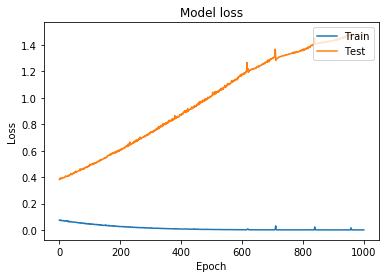

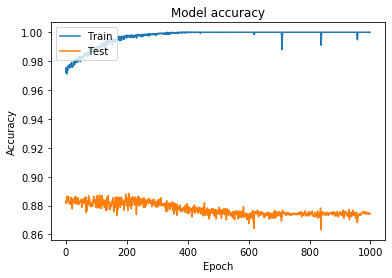

In [70]:
plot_loss(history.history['loss'], history.history['val_loss'])
plot_accuracy(history.history['accuracy'], history.history['val_accuracy'])

We observe the over-fitting here since the traning increases but test set reduces


# Early stopping your model

The early stopping callback is useful since it allows for you to stop the model training if it no longer improves after a given number of epochs. To make use of this functionality you need to pass the callback inside a list to the model's callback parameter in the .fit() method.

The model you built to detect fake dollar bills is loaded for you to train, this time with early stopping. X_train, y_train, X_test and y_test are also available for you to use.


# A combination of callbacks

Deep learning models can take a long time to train, especially when you move to deeper architectures and bigger datasets. Saving your model every time it improves as well as stopping it when it no longer does allows you to worry less about choosing the number of epochs to train for. You can also restore a saved model anytime. 

In [104]:
init_weights = model.get_weights()


In [10]:
# Import the early stopping callback
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

# Define a callback to monitor val_acc
monitor_val_acc = EarlyStopping(monitor='val_accuracy', patience=5)

modelCheckpoint = ModelCheckpoint('best_banknote_model.hdf5', save_best_only = True)


model.fit(sensors_train, parcels_train, epochs=1000, validation_data=(sensors_test, parcels_test),
          callbacks=[monitor_val_acc,modelCheckpoint ], verbose= 0)


# Different activation functions
We  try out different activation functions on the multi-label model you built for the irrigation machine dataset. The function get_model() returns a copy of this model and applies the activation function, passed on as a parameter, to its hidden layer.
We  build a loop that goes through several activation functions, generates a new model for each and trains it. Storing the history callback in a dictionary will allow us to compare and visualize which activation function.

In [430]:
# Set a random seed
np.random.seed(1)
# Return a new model with the given activation
def get_model(act): 
    model = Sequential()
    model.add(Dense(64, input_shape=(20,), activation=act))
    model.add(Dense(3, activation='sigmoid'))
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

sensors_train, sensors_test, parcels_train, parcels_test = train_test_split(sensors, parcels, test_size=0.33, random_state=42)


In [431]:

# Activation functions to try
activations = ['relu', 'sigmoid', 'tanh']

# Loop over the activation functions
activation_results = {}

for act in activations:
    # Get a new model with the current activation
    model = get_model(act)
    # Fit the model
    history = model.fit(sensors_train, parcels_train, validation_data=(sensors_test,parcels_test), epochs=200, verbose=0)
    activation_results[act] = history

In [432]:
activations = ['relu', 'sigmoid', 'tanh']
loss = {}
accuracy = {}
for act in activations:
    loss[act] = activation_results[act].history['loss']
    accuracy[act] = activation_results[act].history['accuracy']


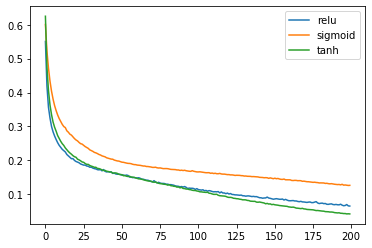

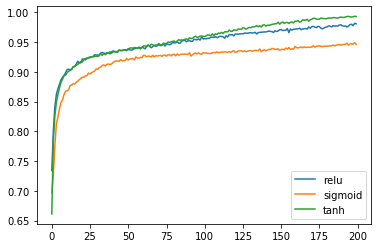

In [433]:
# Create a dataframe from val_loss_per_function
val_loss= pd.DataFrame(loss)

# Call plot on the dataframe
val_loss.plot()
plt.show()

# Create a dataframe from val_acc_per_function
val_acc = pd.DataFrame(accuracy)

# Call plot on the dataframe
val_acc.plot()
plt.show()

# Hyperparameter tuning
List of Neural network hyperparameters  are:

Number of layers

Number of neurons per layer

Layer activations

Batch sizes

Learning rates

Optimizers

As an example we optimize the the learning_rate, epochs, batch_size, and activation functions.

In [12]:
import tensorflow
# Set a random seed
np.random.seed(1)
# Return a new model with the given activation
def create_model(learning_rate, activation): 
    opt = tensorflow.keras.optimizers.Adam(lr=learning_rate)
    model = Sequential()
    model.add(Dense(64, input_shape=(20,), activation=activation))
    model.add(Dense(3, activation='sigmoid'))
    model.compile(optimizer= opt, loss='binary_crossentropy', metrics=['accuracy'])
    return model



In [13]:
sensors_train, sensors_test, parcels_train, parcels_test = train_test_split(sensors, parcels, test_size=0.33, random_state=42)


In [14]:
# Import KerasClassifier from keras wrappers
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import RandomizedSearchCV

# Create a KerasClassifier
model = KerasClassifier(build_fn = create_model)

# Define the parameters to try out
params = {'activation':['relu', 'tanh'], 'batch_size':[32, 128, 256], 
          'epochs':[50, 100, 200], 'learning_rate':[0.1, 0.01, 0.001]}

# Create a randomize search cv object passing in the parameters to try
random_search = RandomizedSearchCV(model, param_distributions = params, cv = 3)
random_search.fit(sensors_train, parcels_train, verbose= 0)


894/894 [==============================] - 0s 75us/sample - loss: 0.1427 - accuracy: 0.9396


RandomizedSearchCV(cv=3, error_score='raise',
          estimator=<tensorflow.python.keras.wrappers.scikit_learn.KerasClassifier object at 0x00000187E9A2CE80>,
          fit_params=None, iid=True, n_iter=10, n_jobs=1,
          param_distributions={'activation': ['relu', 'tanh'], 'batch_size': [32, 128, 256], 'epochs': [50, 100, 200], 'learning_rate': [0.1, 0.01, 0.001]},
          pre_dispatch='2*n_jobs', random_state=None, refit=True,
          return_train_score='warn', scoring=None, verbose=0)

In [423]:
print(random_search.best_score_)
print(random_search.best_params_)

0.9002487358317446
{'learning_rate': 0.01, 'epochs': 50, 'batch_size': 256, 'activation': 'tanh'}


# Learning curves

In general, the accuracy of a model should be modified bz increasing the number of trainig set. To test that, we devide our training set to lower numbers in some steps to get the similar resluts of graph which is shown below.


<img src="num2.png" style="width:400px;height:250px;">


In [ ]:
train = pd.read_csv("irrigation_machine.csv")

In [136]:
X_train, X_test, y_train, y_test = train_test_split(sensors, parcels, test_size=0.33, random_state=42)

training_sizes = np.array([ 100,  200,  500, 1340])
early_stop = EarlyStopping(monitor='loss', patience=1)
train_accs = []
test_accs = []
init_weights = model.get_weights()

for size in training_sizes:
    # Get a fraction of training data (we only care about the training data)
    X_train_frac, y_train_frac = X_train[:size], y_train[:size]

    # Reset the model to the initial weights and train it on the new data fraction
    model.set_weights(init_weights)
    model.fit(X_train_frac, y_train_frac, epochs = 50, callbacks = [early_stop])

    # Get the accuracy for this training set fraction
    #train_acc = model.evaluate(X_train_frac, y_train_frac, verbose=0)[1]
    # train_accs.append(train_acc)
    
    # Evaluate and store the train fraction and the complete test set results
    train_accs.append(model.evaluate(X_train_frac, y_train_frac)[1])
    test_accs.append(model.evaluate(X_test, y_test)[1])
    


Train on 100 samples
Epoch 1/50
100/100 [==============================] - 0s 1ms/sample - loss: 0.0063 - accuracy: 0.9967
Epoch 2/50
100/100 [==============================] - 0s 171us/sample - loss: 0.0041 - accuracy: 1.0000
Epoch 3/50
100/100 [==============================] - 0s 93us/sample - loss: 0.0020 - accuracy: 1.0000
Epoch 4/50
100/100 [==============================] - 0s 527us/sample - loss: 0.0011 - accuracy: 1.0000
Epoch 5/50
100/100 [==============================] - 0s 737us/sample - loss: 6.8964e-04 - accuracy: 1.0000
Epoch 6/50
100/100 [==============================] - 0s 224us/sample - loss: 4.1477e-04 - accuracy: 1.0000
Epoch 7/50
100/100 [==============================] - 0s 88us/sample - loss: 3.5686e-04 - accuracy: 1.0000
Epoch 8/50
100/100 [==============================] - 0s 210us/sample - loss: 3.1207e-04 - accuracy: 1.0000
Epoch 9/50
100/100 [==============================] - 0s 303us/sample - loss: 2.9350e-04 - accuracy: 1.0000
Epoch 10/50
100/100 [======

500/500 [==============================] - 0s 151us/sample - loss: 1.7474e-04 - accuracy: 1.0000
Epoch 47/50
500/500 [==============================] - 0s 91us/sample - loss: 1.7300e-04 - accuracy: 1.0000
Epoch 48/50
500/500 [==============================] - 0s 138us/sample - loss: 1.7246e-04 - accuracy: 1.0000
Epoch 49/50
500/500 [==============================] - 0s 113us/sample - loss: 1.7070e-04 - accuracy: 1.0000
Epoch 50/50
660/660 [==============================] - 0s 166us/sample - loss: 1.5165 - accuracy: 0.8778
Train on 1340 samples
Epoch 1/50
1340/1340 [==============================] - 0s 188us/sample - loss: 0.0052 - accuracy: 0.9980
Epoch 2/50
1340/1340 [==============================] - 0s 161us/sample - loss: 0.0012 - accuracy: 0.9998
Epoch 3/50
1340/1340 [==============================] - 1s 546us/sample - loss: 4.8341e-04 - accuracy: 1.0000
Epoch 4/50
1340/1340 [==============================] - 1s 676us/sample - loss: 4.1037e-04 - accuracy: 1.0000
Epoch 5/50
1340/13

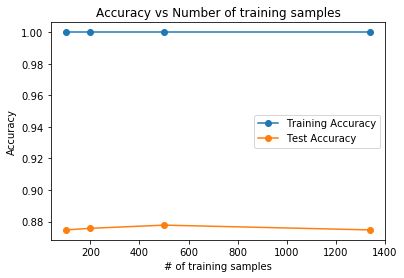

In [137]:
import matplotlib.pyplot as plt
def plot_results(train_accs,test_accs):
    plt.plot(training_sizes, train_accs, 'o-', label="Training Accuracy")
    plt.plot(training_sizes, test_accs, 'o-', label="Test Accuracy")
    plt.title('Accuracy vs Number of training samples')
    plt.xlabel('# of training samples')
    plt.ylabel('Accuracy')
    plt.legend(loc="best")
    plt.show()
    
plot_results(train_accs, test_accs)